## Import de librerias y DF

In [ ]:
# importo librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')


In [2]:
# importo df
df_churn = pd.read_csv(r'Churn.csv', sep=';', decimal=',')

In [3]:
# primeras 5 filas del df
df_churn.head(5)

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# Se analiza el tipo de formato de los datos
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3099 non-null   object 
 1   Account_Length  3099 non-null   int64  
 2   Area_Code       3099 non-null   int64  
 3   Phone           3099 non-null   object 
 4   Intl_Plan       3099 non-null   object 
 5   Vmail_Plan      3099 non-null   object 
 6   Vmail_Message   3099 non-null   int64  
 7   Day_Mins        3099 non-null   float64
 8   Day_Calls       3099 non-null   int64  
 9   Day_Charge      3099 non-null   float64
 10  Eve_Mins        3099 non-null   float64
 11  Eve_Calls       3099 non-null   int64  
 12  Eve_Charge      3099 non-null   float64
 13  Night_Mins      3099 non-null   float64
 14  Night_Calls     3099 non-null   int64  
 15  Night_Charge    3099 non-null   float64
 16  Intl_Mins       3099 non-null   float64
 17  Intl_Calls      3099 non-null   i

In [5]:
# Pasamos a categorica el codigo de area porque está como numérica      
df_churn['Area_Code'] = df_churn['Area_Code'].astype('object')

In [6]:
# Analisis de cuántos area code distintos hay
# Solamente hay 3 area code lo cual es sospechoso porque debería haber uno por cada estado
df_churn['Area_Code'].value_counts()


Area_Code
415    1543
510     781
408     775
Name: count, dtype: int64

In [7]:
# Analis de cuántos states distintos hay para confirmar si Area code es un dato anómalo
df_churn['State'].nunique()

51

In [8]:
df_churn = df_churn.drop(columns=['Area_Code'])


### Tal como se logra observar, hay 51 estados distintos en el dataset y 3 códigos de área nada más, por lo que se procede a eliminar del análisis la variable



In [9]:
# El Data Frame tiene 3099 filas y 21 columnas
df_churn.shape

(3099, 20)

In [10]:
# resumen estadistico de los datos
df_churn.describe()

,Account_Length,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3099.00000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000
mean,101.18393,8.074540,179.596999,100.366570,30.532043,201.024266,100.013875,17.087270,200.682995,99.971281,9.030810,10.236528,4.462407,2.764372,1.555340
std,39.85297,13.668535,54.632572,20.081223,9.287510,50.900248,19.860313,4.326493,50.613708,19.508605,2.277665,2.782396,2.441330,0.751239,1.312804
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.00000,0.000000,143.900000,87.000000,24.460000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.00000,0.000000,179.300000,101.000000,30.480000,201.300000,100.000000,17.110000,201.300000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,19.500000,216.000000,114.000000,36.720000,235.800000,113.500000,20.040000,235.150000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000
max,243.00000,51.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,395.000000,175.000000,17.770000,20.000000,19.000000,5.400000,9.000000


### No se observan valores irracionales, no se hallan valores inferiores a 0.

In [11]:
# No hay nulos
df_churn.isna().sum().sum()

np.int64(0)

In [12]:
# EL data frame posee 447 casos de churn
df_churn.Churn.value_counts()

Churn
False.    2652
True.      447
Name: count, dtype: int64

In [13]:
# La tasa de abandono es aproximadamente de un 14 %
df_churn.Churn.value_counts('%')

Churn
False.    0.85576
True.     0.14424
Name: proportion, dtype: float64

In [43]:
# Transformo Churn en numeric para trabajarlo mas facilmente
df_churn['Flag_churn'] = df_churn['Churn'].map({'True.': 1, 'False.': 0})
df_churn = df_churn.drop(columns=['Churn'])

## Univariado

### Analisis univariado de las variables mas importantes

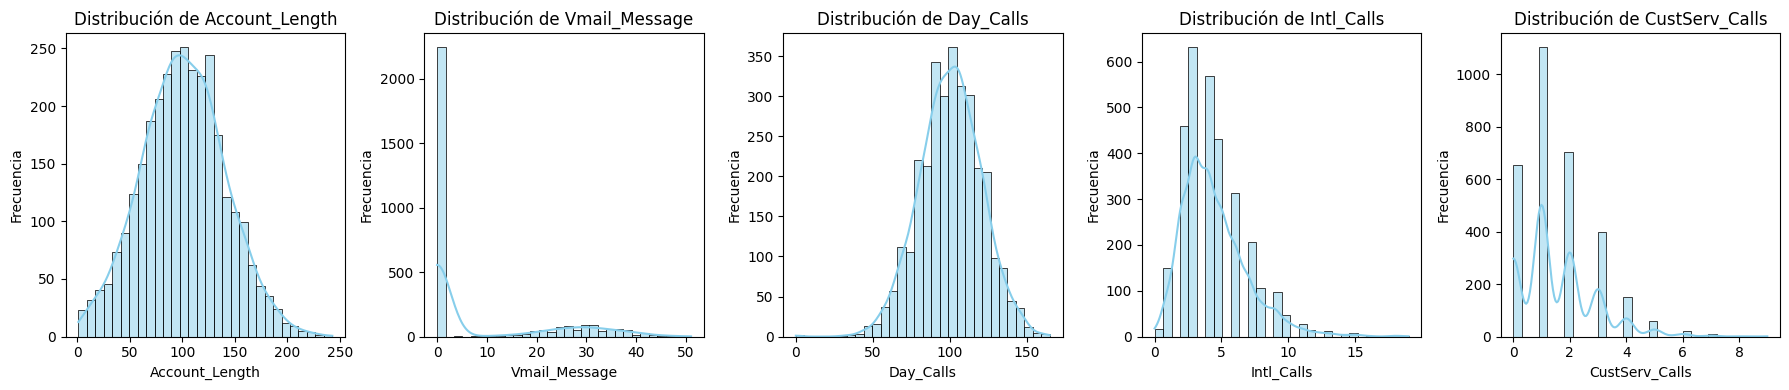

In [15]:

# Variables numéricas
variables_numericas = ['Account_Length','Vmail_Message','Day_Calls','Intl_Calls', 'CustServ_Calls']

fig, axes = plt.subplots(1, len(variables_numericas), figsize=(18, 4))
for i, var in enumerate(variables_numericas):
    sns.histplot(df_churn[var], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

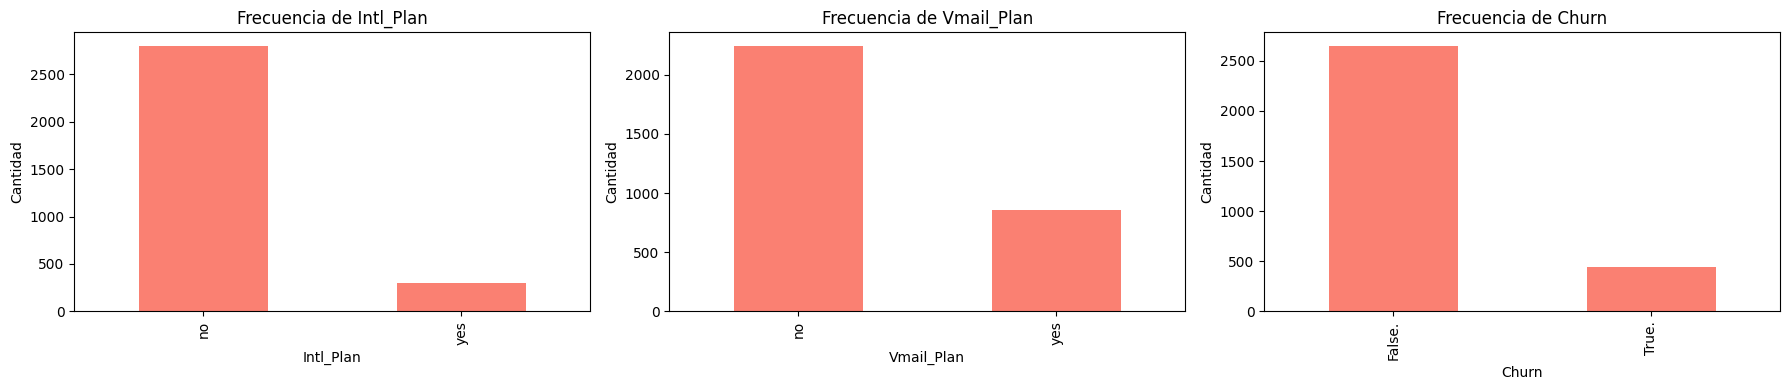

In [16]:
# Variables categóricas
variables_categoricas = ['Intl_Plan', 'Vmail_Plan', 'Churn']

fig, axes = plt.subplots(1, len(variables_categoricas), figsize=(18, 4))
for i, var in enumerate(variables_categoricas):
    df_churn[var].value_counts().plot(kind='bar', color='salmon', ax=axes[i])
    axes[i].set_title(f'Frecuencia de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Cantidad')
plt.tight_layout()
plt.show()

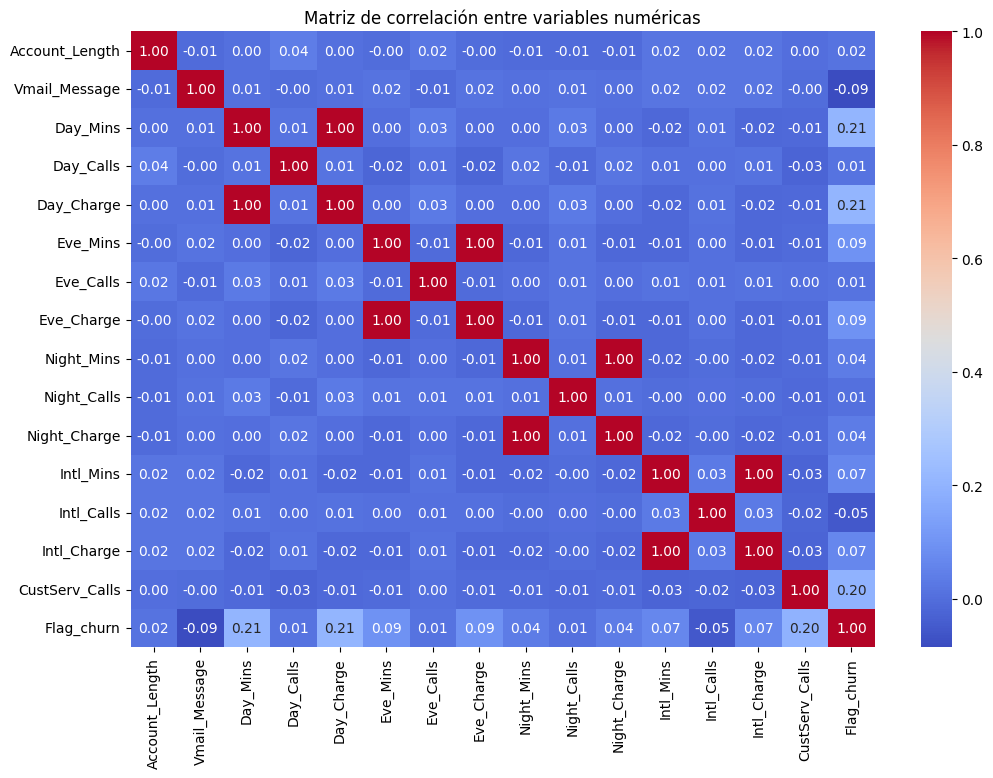

In [17]:
# Calcular y mostrar la matriz de correlación de las variables numéricas
correlacion = df_churn.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [18]:
# Detectar variables con correlación mayor al 90% (positiva o negativa)
umbral = 0.9
correlaciones_altas = []

# Recorremos la matriz de correlación solo por encima de la diagonal principal
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        valor_corr = correlacion.iloc[i, j]
        if abs(valor_corr) > umbral:
            correlaciones_altas.append((
                correlacion.columns[i],
                correlacion.columns[j],
                valor_corr
            ))

if correlaciones_altas:
    print("Pares de variables con correlación mayor al 90% (positiva o negativa):")
    for var1, var2, corr in correlaciones_altas:
        print(f"{var1} y {var2}: correlación = {corr:.2f}")
else:
    print("No se encontraron pares de variables con correlación mayor al 90%.")


Pares de variables con correlación mayor al 90% (positiva o negativa):
Day_Mins y Day_Charge: correlación = 1.00
Eve_Mins y Eve_Charge: correlación = 1.00
Night_Mins y Night_Charge: correlación = 1.00
Intl_Mins y Intl_Charge: correlación = 1.00


In [19]:
# Se elimina una de las variables correlacionadas
df_churn = df_churn.drop(columns=['Day_Charge','Eve_Charge','Night_Charge','Intl_Charge'])

### Tal como se puede observar, Day_Mins y Day_Charge - Eve_Mins y Eve_Charge - Night_Mins y Night_Charge - Intl_Mins y Intl_Charge tienen una correlación perfecta positiva, por lo que se eliminan las variables de monto porque el monto es menos estable en el tiempo por ejemplo por la inflación


## Bi Variado

### Analisis univariado de las variables mas importantes

In [20]:
# Se compara cada variable con respecto al Churn para entender el comportamiento frente a la variable de clase
variables_categoricas = ['Vmail_Plan', 'Intl_Plan']  

for var in variables_categoricas:
    print(f"\nTabla de contingencia para {var} vs Flag_churn:")
    display(pd.crosstab(df_churn[var], df_churn['Flag_churn'], margins=True, normalize='index'))

variables_numericas = df_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_numericas = [v for v in variables_numericas if v != 'Flag_churn']



Tabla de contingencia para Vmail_Plan vs Flag_churn:


Flag_churn,0,1
Vmail_Plan,,
no,0.834670,0.165330
yes,0.911111,0.088889
All,0.855760,0.144240



Tabla de contingencia para Intl_Plan vs Flag_churn:


Flag_churn,0,1
Intl_Plan,,
no,0.885357,0.114643
yes,0.578595,0.421405
All,0.855760,0.144240


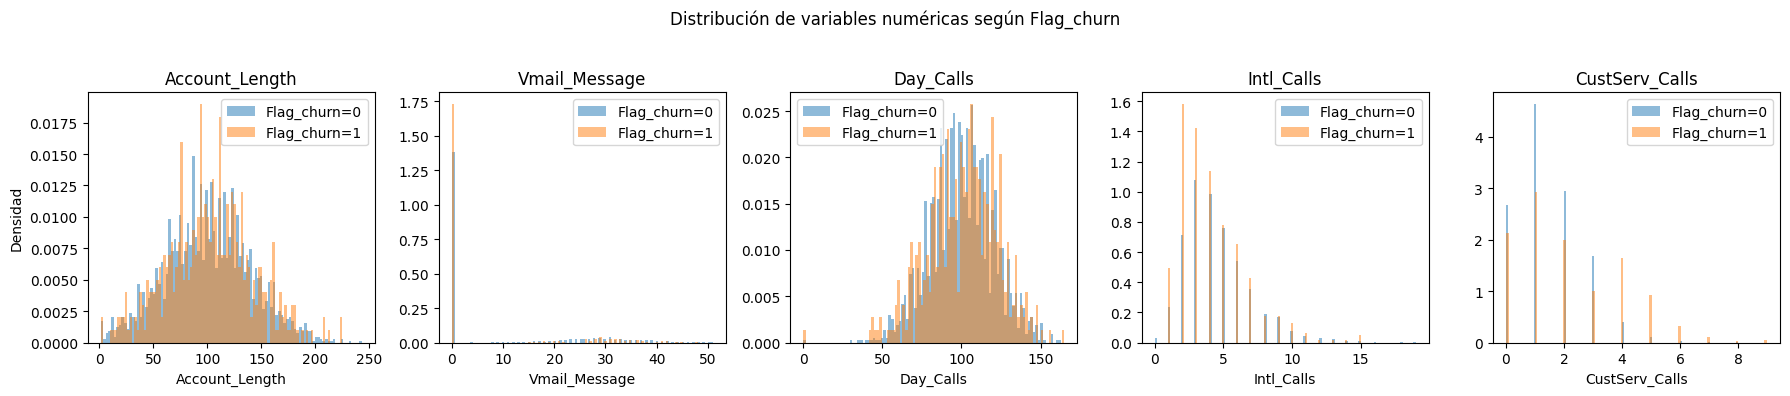

In [21]:

# comparacion de la distribucion de las variables numericas mas importantes frente al flag de churn
variables_numericas = ['Account_Length','Vmail_Message','Day_Calls','Intl_Calls', 'CustServ_Calls']

fig, axes = plt.subplots(1, len(variables_numericas), figsize=(18, 4))
for i, var in enumerate(variables_numericas):
    ax = axes[i]
    for flag in [0,1]:
        subset = df_churn[df_churn['Flag_churn'] == flag]
        ax.hist(subset[var], bins=100, alpha=0.5, label=f'Flag_churn={flag}', density=True)
    ax.set_title(f'{var}')
    ax.set_xlabel(var)
    if i == 0:
        ax.set_ylabel('Densidad')
    else:
        ax.set_ylabel('')
    ax.legend()
plt.suptitle('Distribución de variables numéricas según Flag_churn')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Se observa que CustServ_Calls a partir de 4 predomina el flag_churn=1 por lo que se aperturan los datos para obtener un mayor entendimiento


In [22]:

# Se observa que a partir del cuarto llamado de 
# atencion al cliente la propension de churn aumenta notoriamente de un 10% a un 44% aproximadamente.
df_churn.groupby('CustServ_Calls')['Flag_churn'].describe()

,count,mean,std,min,25%,50%,75%,max
CustServ_Calls,,,,,,,,
0,652.0,0.131902,0.338644,0.0,0.00,0.0,0.00,1.0
1,1102.0,0.107078,0.309353,0.0,0.00,0.0,0.00,1.0
2,704.0,0.113636,0.317595,0.0,0.00,0.0,0.00,1.0
3,397.0,0.100756,0.301385,0.0,0.00,0.0,0.00,1.0
4,152.0,0.434211,0.497291,0.0,0.00,0.0,1.00,1.0
5,59.0,0.627119,0.487722,0.0,0.00,1.0,1.00,1.0
6,21.0,0.619048,0.497613,0.0,0.00,1.0,1.00,1.0
7,8.0,0.500000,0.534522,0.0,0.00,0.5,1.00,1.0
8,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0


In [23]:
# Analisis descriptivo de Vmail_Plan frente a Flag_churn
df_churn.groupby('Vmail_Plan')['Flag_churn'].describe()

,count,mean,std,min,25%,50%,75%,max
Vmail_Plan,,,,,,,,
no,2244.0,0.165330,0.371561,0.0,0.0,0.0,0.0,1.0
yes,855.0,0.088889,0.284750,0.0,0.0,0.0,0.0,1.0


### Una estrategia de ofrecimiento de Vmail podria lograr la fidelizacion del cliente ya que hay un 8% de propension al churn vs un 16 para quienes no tienen Vmail

In [24]:
# Analisis descriptivo de Intl_Plan frente a Flag_churn
df_churn.groupby('Intl_Plan')['Flag_churn'].describe()

,count,mean,std,min,25%,50%,75%,max
Intl_Plan,,,,,,,,
no,2800.0,0.114643,0.318647,0.0,0.0,0.0,0.0,1.0
yes,299.0,0.421405,0.494612,0.0,0.0,0.0,1.0,1.0


### La propension de abandono de aquellos que tienen intl plan es casi 4 veces mas altas que los que no

## Deteccion de anomalias

In [25]:
# Detectar outliers usando el método del rango intercuartílico (IQR) para variables numéricas sin incluir Flag_churn
# Seleccionamos las variables numéricas, excluyendo 'Flag_churn'
# Se utiliza como corte el +- 3 para ser exigente en la detección
variables_numericas = df_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_numericas = [v for v in variables_numericas if v != 'Flag_churn']

outliers_dict = {}

for var in variables_numericas:
    Q1 = df_churn[var].quantile(0.25)
    Q3 = df_churn[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR
    outliers = df_churn[(df_churn[var] < limite_inferior) | (df_churn[var] > limite_superior)]
    outliers_dict[var] = outliers.index.tolist()
    print(f"Variable: {var} - Cantidad de outliers detectados: {len(outliers)}")

# Si se desea ver los valores de los outliers por variable:
for var, idxs in outliers_dict.items():
    if len(idxs) > 0:
        valores = df_churn.loc[idxs, var].values
        print(f"Variable: {var} - Valores de outliers: {valores}")

Variable: Account_Length - Cantidad de outliers detectados: 0
Variable: Vmail_Message - Cantidad de outliers detectados: 0
Variable: Day_Mins - Cantidad de outliers detectados: 0
Variable: Day_Calls - Cantidad de outliers detectados: 2
Variable: Eve_Mins - Cantidad de outliers detectados: 0
Variable: Eve_Calls - Cantidad de outliers detectados: 1
Variable: Night_Mins - Cantidad de outliers detectados: 0
Variable: Night_Calls - Cantidad de outliers detectados: 0
Variable: Intl_Mins - Cantidad de outliers detectados: 0
Variable: Intl_Calls - Cantidad de outliers detectados: 6
Variable: CustServ_Calls - Cantidad de outliers detectados: 33
Variable: Day_Calls - Valores de outliers: [0 0]
Variable: Eve_Calls - Valores de outliers: [0]
Variable: Intl_Calls - Valores de outliers: [19 18 18 16 16 18]
Variable: CustServ_Calls - Valores de outliers: [7 7 9 6 6 6 7 6 6 6 6 6 6 8 6 7 7 7 8 6 6 6 9 6 6 6 6 7 6 6 7 6 6]


### Se concluye no tratar los valores outliers dado que consideramos que aportan mucho valor a este analisis en particular. Sin embargo, en caso de querer tratarlos se puede imputar la media / moda / etc.

## MODELADO

## Split - Metodo Holdout (70 % Train - 30 % Test)

In [ ]:


# Creamos una lista para guardar las columnas con diferencia significativa de medias
columnas_significativas = []
columnas_no_significativas = []

# Separamos el DataFrame en churn = 1 y churn = 0
df_churn_1 = df_churn[df_churn['Flag_churn'] == 1]
df_churn_0 = df_churn[df_churn['Flag_churn'] == 0]

# Seleccionamos todas las columnas excepto la variable objetivo
columnas = [col for col in df_churn.columns if col != 'Flag_churn']

for col in columnas:
    # Si la columna es numérica, hacemos t-test directamente
    if df_churn[col].dtype in ['int64', 'float64']:
        datos_1 = df_churn_1[col].dropna()
        datos_0 = df_churn_0[col].dropna()
        stat, pvalue = ttest_ind(datos_1, datos_0, equal_var=False)
        print(f"Columna: {col} | p-value: {pvalue:.4f}")
        if pvalue < 0.05:
            columnas_significativas.append(col)
    # Si la columna es categórica, la convertimos a numérica usando codes
    else:
        datos_1 = df_churn_1[col].astype('category').cat.codes
        datos_0 = df_churn_0[col].astype('category').cat.codes
        stat, pvalue = ttest_ind(datos_1, datos_0, equal_var=False)
        print(f"Columna: {col} (categórica) | p-value: {pvalue:.4f}")
        if pvalue < 0.05:
            columnas_significativas.append(col)
        else: columnas_no_significativas.append(col)

print("\nColumnas con diferencia significativa de medias (alfa = 0.05):")
print(columnas_significativas)
print("\nColumnas con diferencia no significativa de medias (alfa = 0.05):")
print(columnas_no_significativas)



Columna: State (categórica) | p-value: 0.2054
Columna: Account_Length | p-value: 0.3871
Columna: Phone (categórica) | p-value: 0.0000
Columna: Intl_Plan (categórica) | p-value: 0.0000
Columna: Vmail_Plan (categórica) | p-value: 0.0000
Columna: Vmail_Message | p-value: 0.0000
Columna: Day_Mins | p-value: 0.0000
Columna: Day_Calls | p-value: 0.5081
Columna: Eve_Mins | p-value: 0.0000
Columna: Eve_Calls | p-value: 0.4039
Columna: Night_Mins | p-value: 0.0310
Columna: Night_Calls | p-value: 0.7132
Columna: Intl_Mins | p-value: 0.0003
Columna: Intl_Calls | p-value: 0.0041
Columna: CustServ_Calls | p-value: 0.0000

Columnas con diferencia significativa de medias (alfa = 0.05):
['Phone', 'Intl_Plan', 'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Intl_Calls', 'CustServ_Calls']

Columnas con diferencia no significativa de medias (alfa = 0.05):
['State']


In [27]:

# La variable objetivo es 'Flag_churn' 
# Se elimina phone ya que no tienen valor relevante y genera overfitting
# 
X = df_churn.drop(['Flag_churn','Churn','Phone'], axis=1)
y = df_churn['Flag_churn']

# Realizamos el split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (2169, 14), Test shape: (930, 14)


In [28]:
# Transformamos variables categoricas en numericas con One-Hot Encoder
columnas_categoricas = ['State','Intl_Plan','Vmail_Plan']

# Aplicamos one-hot encoding a las variables categóricas
X_train = pd.get_dummies(X_train, columns=columnas_categoricas, drop_first=True)
X_test = pd.get_dummies(X_test, columns=columnas_categoricas, drop_first=True)



# Desicion Tree sin paremetrizar

In [29]:
# 1. Árbol de Decisión

# Creamos el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Realizamos predicciones
y_pred_arbol = modelo_arbol.predict(X_test)

# Mostramos los resultados
print("Resultados Árbol de Decisión:")

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_arbol)



Resultados Árbol de Decisión:


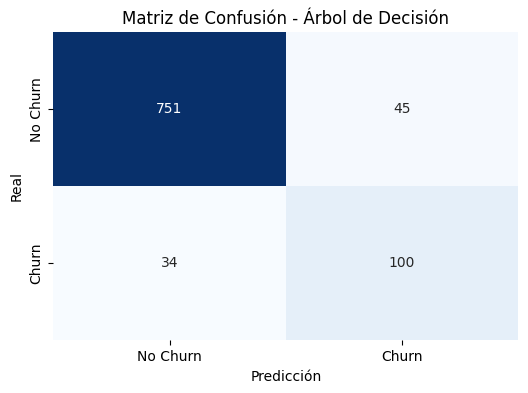

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       796
           1       0.69      0.75      0.72       134

    accuracy                           0.92       930
   macro avg       0.82      0.84      0.83       930
weighted avg       0.92      0.92      0.92       930

Accuracy: 0.9151



In [30]:

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# También mostramos el reporte de clasificación y accuracy
print(classification_report(y_test, y_pred_arbol))
print(f"Accuracy: {accuracy_score(y_test, y_pred_arbol):.4f}\n")

# Desicion Tree con Hiperparametrizacion 

In [31]:
## PROBAMOS CON NUEVOS HIPERPARAMETROS

# Buscamos la mejor parametrización para el árbol de decisión
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Creamos el modelo base
arbol = DecisionTreeClassifier(random_state=42)

# Configuramos el GridSearchCV
grid_search = GridSearchCV(
    estimator=arbol,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Ajustamos el GridSearch a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para DecisionTreeClassifier:")
print(grid_search.best_params_)

# Evaluamos el mejor modelo en el conjunto de prueba
mejor_arbol = grid_search.best_estimator_
y_pred_grid = mejor_arbol.predict(X_test)




Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max

Resultados Árbol de Decisión (Grid Search):


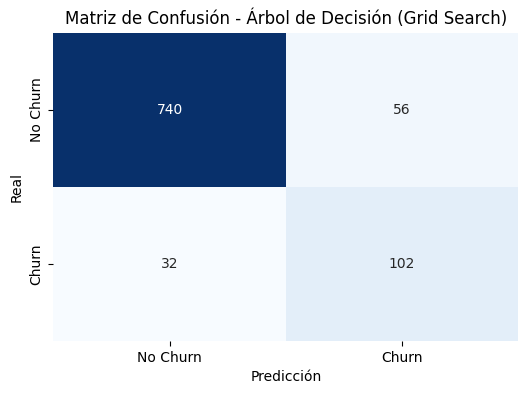

,precision,recall,f1-score,support
0,0.959,0.930,0.944,796.000
1,0.646,0.761,0.699,134.000
accuracy,0.905,0.905,0.905,0.905
macro avg,0.802,0.845,0.821,930.000
weighted avg,0.913,0.905,0.909,930.000


Accuracy: 0.9054



In [32]:
print("Resultados Árbol de Decisión (Grid Search):")

# Matriz de confusión
cm_grid = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(6,4))
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión (Grid Search)')
plt.show()

# Mostramos el reporte de clasificación en formato de DataFrame
from sklearn.metrics import classification_report
import pandas as pd

reporte = classification_report(y_test, y_pred_grid, output_dict=True)
df_reporte = pd.DataFrame(reporte).transpose()
df_reporte = df_reporte[['precision', 'recall', 'f1-score', 'support']]
df_reporte = df_reporte.round(3)
display(df_reporte)

# Mostramos el accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid):.4f}\n")

In [33]:
# 2. Random Forest con GridSearchCV para optimizar hiperparámetros según recall

# Definimos el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Creamos el modelo base
rf = RandomForestClassifier(random_state=42)

# Configuramos el GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Ajustamos el GridSearch a los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para RandomForestClassifier:")
print(grid_search_rf.best_params_)

# Evaluamos el mejor modelo en el conjunto de prueba
mejor_rf = grid_search_rf.best_estimator_
y_pred_rf = mejor_rf.predict(X_test)



Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END 

Resultados Random Forest (Grid Search):


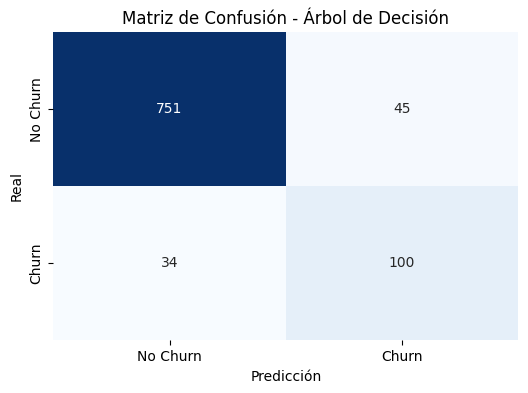

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       796
           1       0.69      0.75      0.72       134

    accuracy                           0.92       930
   macro avg       0.82      0.84      0.83       930
weighted avg       0.92      0.92      0.92       930

Accuracy: 0.9151



In [34]:
print("Resultados Random Forest (Grid Search):")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# También mostramos el reporte de clasificación y accuracy
print(classification_report(y_test, y_pred_arbol))
print(f"Accuracy: {accuracy_score(y_test, y_pred_arbol):.4f}\n")

In [35]:
# GridSearchCV para Gradient Boosting

# Definimos el grid de hiperparámetros para GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creamos el modelo base
gb = GradientBoostingClassifier(random_state=42)

# Configuramos el GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Ajustamos el GridSearch a los datos de entrenamiento
grid_search_gb.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

In [36]:
# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para GradientBoostingClassifier:")
print(grid_search_gb.best_params_)

# Evaluamos el mejor modelo en el conjunto de prueba
mejor_gb = grid_search_gb.best_estimator_
y_pred_gb_grid = mejor_gb.predict(X_test)


Mejores hiperparámetros para GradientBoostingClassifier:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Resultados Gradient Boosting (Grid Search):


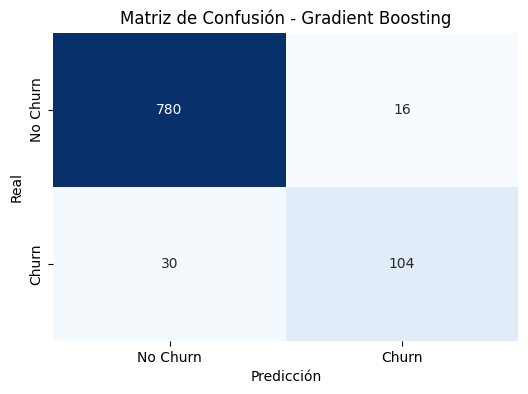

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       796
           1       0.87      0.78      0.82       134

    accuracy                           0.95       930
   macro avg       0.91      0.88      0.90       930
weighted avg       0.95      0.95      0.95       930

Accuracy: 0.9505



In [37]:
print("Resultados Gradient Boosting (Grid Search):")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb_grid), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()

# También mostramos el reporte de clasificación y accuracy
print(classification_report(y_test, y_pred_gb_grid))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb_grid):.4f}\n")


## Evaluación Completa de Modelos


In [38]:
# Función para evaluar modelos de manera consistente
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    """Función para evaluar un modelo y mostrar métricas completas"""
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    
    # Métricas básicas
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Métricas adicionales
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"\n=== {nombre_modelo} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"\nMatriz de Confusión:")
    print(cm)
    print(f"\nReporte de Clasificación:") 
    return {
        'modelo': nombre_modelo,
        'accuracy': accuracy,
        'auc': auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }


In [39]:
# Evaluamos todos los modelos entrenados
resultados = []

# 1. Árbol de Decisión (default)
resultados.append(evaluar_modelo(modelo_arbol, X_test, y_test, "Árbol de Decisión (Default)"))

# 2. Árbol de Decisión (optimizado)
if 'mejor_arbol' in locals():
    resultados.append(evaluar_modelo(mejor_arbol, X_test, y_test, "Árbol de Decisión (Optimizado)"))

# 3. Random Forest (optimizado)
if 'mejor_rf' in locals():
    resultados.append(evaluar_modelo(mejor_rf, X_test, y_test, "Random Forest (Optimizado)"))

# 4. Gradient Boosting (default)
resultados.append(evaluar_modelo(modelo_gb, X_test, y_test, "Gradient Boosting (Default)"))

# 5. Gradient Boosting (optimizado)
if 'mejor_gb' in locals():
    resultados.append(evaluar_modelo(mejor_gb, X_test, y_test, "Gradient Boosting (Optimizado)"))



=== Árbol de Decisión (Default) ===
Accuracy: 0.9151
AUC-ROC: 0.8449
Precision: 0.6897
Recall (Sensitivity): 0.7463
F1-Score: 0.7168
Specificity: 0.9435

Matriz de Confusión:
[[751  45]
 [ 34 100]]

Reporte de Clasificación:

=== Árbol de Decisión (Optimizado) ===
Accuracy: 0.9054
AUC-ROC: 0.8454
Precision: 0.6456
Recall (Sensitivity): 0.7612
F1-Score: 0.6986
Specificity: 0.9296

Matriz de Confusión:
[[740  56]
 [ 32 102]]

Reporte de Clasificación:

=== Random Forest (Optimizado) ===
Accuracy: 0.9129
AUC-ROC: 0.9264
Precision: 0.9206
Recall (Sensitivity): 0.4328
F1-Score: 0.5888
Specificity: 0.9937

Matriz de Confusión:
[[791   5]
 [ 76  58]]

Reporte de Clasificación:


NameError: name 'modelo_gb' is not defined

In [ ]:
# Crear DataFrame comparativo de resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.drop(['y_pred', 'y_pred_proba'], axis=1)

print("\n=== COMPARACIÓN DE MODELOS ===")
print(df_resultados.round(4))

# Encontrar el mejor modelo por cada métrica
print("\n=== MEJORES MODELOS POR MÉTRICA ===")
for metrica in ['accuracy', 'auc', 'precision', 'recall', 'f1']:
    mejor_idx = df_resultados[metrica].idxmax()
    mejor_modelo = df_resultados.loc[mejor_idx, 'modelo']
    mejor_valor = df_resultados.loc[mejor_idx, metrica]
    print(f"{metrica.upper()}: {mejor_modelo} ({mejor_valor:.4f})")



=== COMPARACIÓN DE MODELOS ===
                           modelo  accuracy     auc  precision  recall  \
0     Árbol de Decisión (Default)    0.9151  0.8449     0.6897  0.7463   
1  Árbol de Decisión (Optimizado)    0.9054  0.8454     0.6456  0.7612   
2      Random Forest (Optimizado)    0.9129  0.9264     0.9206  0.4328   

       f1  specificity  
0  0.7168       0.9435  
1  0.6986       0.9296  
2  0.5888       0.9937  

=== MEJORES MODELOS POR MÉTRICA ===
ACCURACY: Árbol de Decisión (Default) (0.9151)
AUC: Random Forest (Optimizado) (0.9264)
PRECISION: Random Forest (Optimizado) (0.9206)
RECALL: Árbol de Decisión (Optimizado) (0.7612)
F1: Árbol de Decisión (Default) (0.7168)



Primeras filas del DataFrame scoreado:
      Account_Length  Vmail_Message  Day_Mins  Day_Calls  Eve_Mins  Eve_Calls  \
2553              67              0     260.4        107     208.2        104   
2075              73             28     198.2        107     139.1        123   
1321              51              0     197.8         60     221.0         64   
2007             102              0     242.2         88     233.2         89   
2702             152             20     214.6        108      96.6         82   
720              100             38     177.1         88     163.7        108   
1466             195              0      63.2        108     220.2         88   
563               99              0     145.6        106      98.3        106   
1972             124              0     150.3        101     255.9        112   
1301             137              0     115.0        130     137.8         83   

      Night_Mins  Night_Calls  Intl_Mins  Intl_Calls  ...  State_UT 

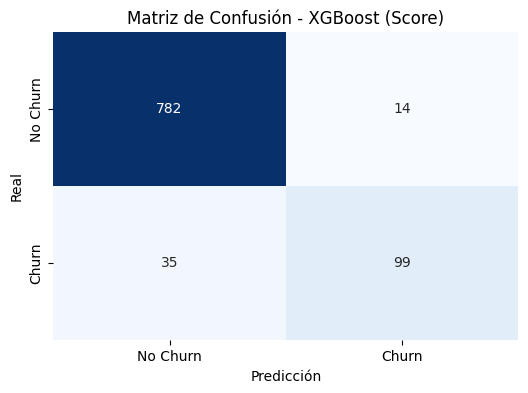

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       796
           1       0.88      0.74      0.80       134

    accuracy                           0.95       930
   macro avg       0.92      0.86      0.89       930
weighted avg       0.95      0.95      0.95       930

Accuracy: 0.9473



In [ ]:
# 1. Predicción de probabilidad con XGBoost y agregar columna score

# Creamos el modelo XGBoost
modelo_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
modelo_xgb.fit(X_train, y_train)

# Obtenemos la probabilidad de la clase positiva (por ejemplo, churn=1)
probabilidad_score = modelo_xgb.predict_proba(X_test)[:, 1]

# Agregamos la columna 'score' al DataFrame de test
df_scoreado = X_test.copy()
df_scoreado['score'] = probabilidad_score

# Mostramos las primeras filas del DataFrame scoreado
print("\nPrimeras filas del DataFrame scoreado:")
print(df_scoreado.head(10))

# Si deseas convertir las probabilidades en predicciones binarias usando un umbral (por defecto 0.5)
umbral = 0.5
y_pred_xgb = (probabilidad_score >= umbral).astype(int)

# Mostramos los resultados
print("Resultados XGBoost (usando predict_proba para score):")

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost (Score)')
plt.show()

# También mostramos el reporte de clasificación y accuracy
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}\n")




In [ ]:
df_scoreado['Reputacion'] =  1 - df_scoreado['score']

In [ ]:
df_scoreado['Reputacion'] = (df_scoreado['Reputacion'] * 998 + 1).round(0).astype(int)

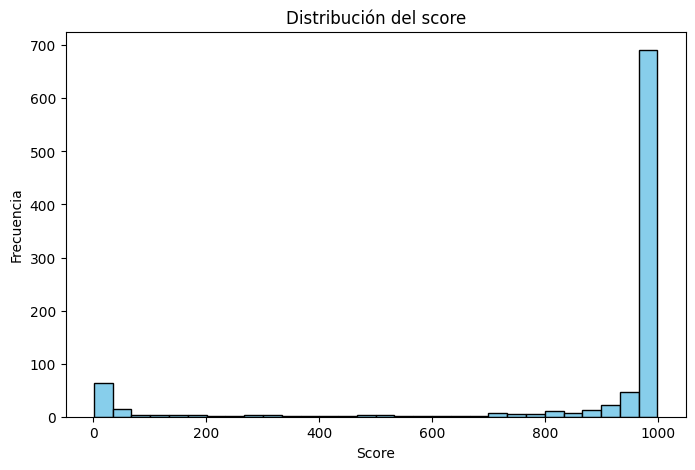

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_scoreado['Reputacion'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del score')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()